In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#  building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalizing the data to help with the training
X_train /= 255.0
X_test /= 255.0

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [8]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 17s 14ms/step - loss: 0.1838 - accuracy: 0.9426
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0594 - accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0334 - accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0132 - accur

In [10]:
pred_e=model.predict(X_test)

In [11]:
import numpy as np
pred=np.argmax(pred_e,axis=1)[:]

In [12]:
for i in pred:
  print('Predicted class is %d and Expected class was %d' % (pred[i],y_test[i]))

Streaming output truncated to the last 5000 lines.
Predicted class is 0 and Expected class was 0
Predicted class is 9 and Expected class was 9
Predicted class is 9 and Expected class was 9
Predicted class is 5 and Expected class was 5
Predicted class is 4 and Expected class was 4
Predicted class is 2 and Expected class was 2
Predicted class is 7 and Expected class was 7
Predicted class is 4 and Expected class was 4
Predicted class is 7 and Expected class was 7
Predicted class is 9 and Expected class was 9
Predicted class is 4 and Expected class was 4
Predicted class is 5 and Expected class was 5
Predicted class is 4 and Expected class was 4
Predicted class is 2 and Expected class was 2
Predicted class is 2 and Expected class was 2
Predicted class is 9 and Expected class was 9
Predicted class is 5 and Expected class was 5
Predicted class is 9 and Expected class was 9
Predicted class is 1 and Expected class was 1
Predicted class is 0 and Expected class was 0
Predicted class is 1 and Expe

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.09


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1127    2    3    0    0    2    0    1    0]
 [   1    1 1025    0    0    0    0    5    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    0    0  976    0    4    0    1    1]
 [   0    1    0    8    0  880    3    0    0    0]
 [   3    2    0    0    1    3  947    0    2    0]
 [   0    2    6    1    0    0    0 1018    1    0]
 [   2    1    2    2    0    0    1    1  963    2]
 [   2    0    1    1    6    4    0    5    1  989]]


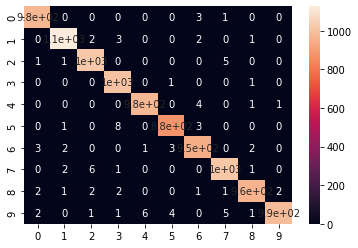

In [15]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)